# iteration csv 파일 다루기

In [ ]:
# 라이브러리 import
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 로그 데이터 셈플

- 다운받기 : [test-training_job.tar.gz](https://deepracer-lecture-open-data.s3.amazonaws.com/download_logs_samples/test-training_job.tar.gz)
- 훈련 트랙 : reinvent_base.npy (re:Invent 2018)

## colab 마운트

In [1]:
from google.colab import drive

drive.mount("./gdrive")

## csv 로그 데이터 전처리

- csv 특성상 콤마(,)를 기준으로 열을 구분하기 때문에 그냥 불러오면 아래와 같이 데이터가 밀릴 수 있습니다. 따라서 전처리 과정이 필요합니다.

![image.png](images/01.png)

- 아래와 같이 `n-iteration.csv` 파일 들이 담겨있는 폴더 경로(simtrace_path)를 입력받아 전처리를 하는 함수 simtrace_preprocessing(simtrace_path)를 정의합니다.

![image.png](images/02.png)

In [ ]:
# iteration.csv 파일이 존재하는 폴더 경로 지정
simtrace_path = "/content/gdrive/MyDrive/deepracer-lecture-open-data/download_logs_sample/test-training-job/sim-trace/training/training-simtrace" 

# 파일 목록 가져오기
file_list = os.listdir(simtrace_path)

# 전처리한 데이터 프레임을 담을 리스트
df_list = []

# 전처리
for target_file in file_list : 
  target_iteration = int(target_file.split('-')[0])
  target_path = os.path.join(simtrace_path, target_file)

  with open(target_path) as f :
      csv_readlines = f.readlines()

  columns = ['iteration'] + csv_readlines[0].replace('\n','').split(',')
  data = []
  for line_text in csv_readlines[1:] :
    row = eval('[' + line_text.replace('\n','').replace('prepare', "'prepare'").replace('in_progress', "'in_progress'").replace('off_track', "'off_track'").replace('crashed',"'off_track'").replace('lap_complete',"'lap_complete'") + ']')
    data.append([target_iteration] + row)

  df_target = pd.DataFrame(columns = columns, data = data)
  df_list.append(df_target)

# 전처리 된 데이터프레임 병합
df_data = pd.concat(df_list).reset_index(drop=True)

df_data

,iteration,episode,steps,X,Y,yaw,steer,throttle,action,reward,done,all_wheels_on_track,progress,closest_waypoint,track_len,tstamp,episode_status,pause_duration
0,0,0,1.0,3.199874,0.683100,0.180986,27.158738,1.061246,"[27.158738446465144, 1.0612456862610395]",0.000,False,True,0.791351,1,17.709159,24.641,prepare,0.0
1,0,0,2.0,3.199733,0.683103,0.183266,-17.584384,1.200000,"[-17.58438357515254, 1.2]",1.000,False,True,0.790551,1,17.709159,24.705,in_progress,0.0
2,0,0,3.0,3.209346,0.682427,0.060816,0.728809,0.500000,"[0.7288087103768568, 0.5]",1.000,False,True,0.844824,1,17.709159,24.769,in_progress,0.0
3,0,0,4.0,3.226847,0.681369,-0.258934,24.909298,0.891043,"[24.90929820058406, 0.8910432441267806]",1.000,False,True,0.943642,1,17.709159,24.848,in_progress,0.0
4,0,0,5.0,3.263133,0.695648,3.226999,30.000000,0.500000,"[30.0, 0.5]",1.000,False,True,1.148668,1,17.709159,24.906,in_progress,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29013,8,179,176.0,3.875741,3.014356,168.606469,28.747749,1.200000,"[28.747749293464032, 1.2]",0.001,False,False,53.988222,58,17.709159,1778.836,in_progress,0.0
29014,8,179,177.0,3.803968,3.024006,169.710349,-30.000000,0.875152,"[-30.0, 0.8751520910948696]",0.001,False,False,54.252652,58,17.709159,1778.913,in_progress,0.0
29015,8,179,178.0,3.731885,3.024565,172.564657,4.999422,0.841107,"[4.999421965975337, 0.8411072167618172]",0.001,False,False,54.509720,58,17.709159,1778.976,in_progress,0.0
29016,8,179,179.0,3.660606,3.023571,174.936658,28.517734,1.133235,"[28.51773365853566, 1.1332351272345815]",0.001,False,False,54.757102,59,17.709159,1779.049,in_progress,0.0


- 주요 변수 설명

  - iteration : episode의 집합.
  - episode : step 의 집합
  - step : episode 의 순서
  - X : 차량의 x좌표
  - Y : 차량의 y좌표
  - yaw : 차량의 정면 각도 ( = heading)
  - steer : 차량 핸들 각도
  - throttle : 차량 속도 ( = speed)
  - action : 행동  
    - 이산공간의 경우 행동의 index 가 표시되고 연속공간의 경우 차량의 핸들 각도와 속도가 각각 action_1, action_2 로 나누어 표시됨
  - reward : 현재 step 에서 받은 보상
  - all_wheels_on_track : 차량의 네 바퀴가 트랙 안에 위치하는지 여부
  - progress : 현재 Epiosde 에서 완주율
  - closest_waypoint : 가장 가까운 waypoint
  - tstamp : 훈련이 진행된 총 시간

## Track

- Track github 레파지토리 가져오기
- Track 정보 확인 : <https://github.com/aws-deepracer-community/deepracer-race-data/tree/main/raw_data/tracks>

In [ ]:
!git clone https://github.com/aws-deepracer-community/deepracer-race-data.git

- Track 가져오기

In [ ]:
numpy_file_name = "reinvent_base.npy"

numpy_file_folder = "deepracer-race-data/raw_data/tracks/npy"
numpy_file_path = os.path.join(numpy_file_folder,numpy_file_name)
track_arr = np.load(numpy_file_path)

## 시각화

### 자취 분포 시각화

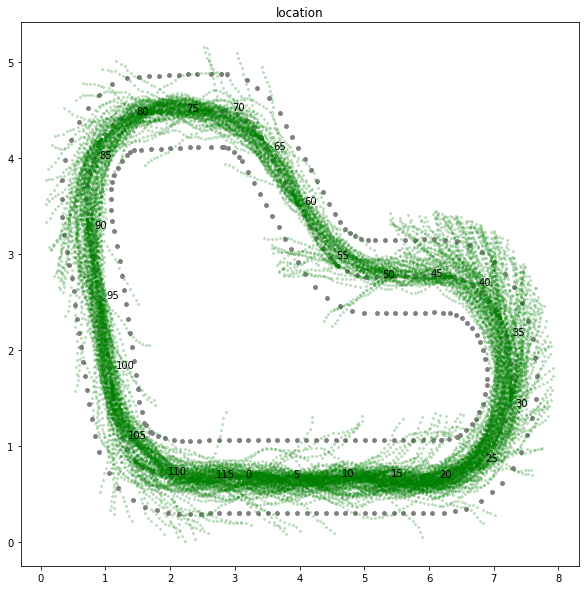

In [ ]:
# 트랙 waypoint 가져오기
track_C = track_arr[:,[0,1]]  # 트랙 중심 좌표
track_L = track_arr[:,[2,3]]  # 트랙 좌측 좌표
track_R = track_arr[:,[4,5]]  # 트랙 우측 좌표

# 트랙 시각화
plt.figure(figsize = (10,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 로그 자취 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = 'green', s = 4, alpha = 0.2)

# 출력
plt.title("location")
plt.show()

### 속도 분포 시각화

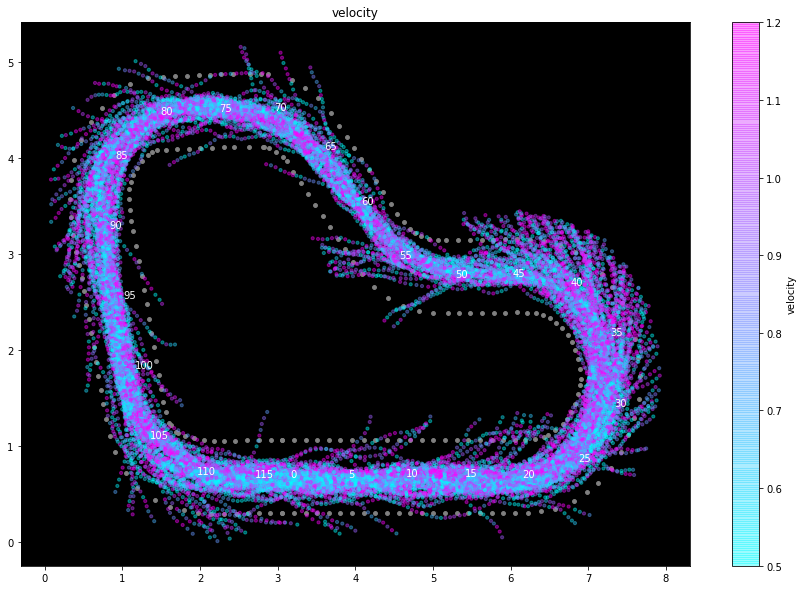

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 속도에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['throttle'], s = 10, alpha = 0.4, cmap = plt.cm.cool)
plt.colorbar(label='velocity')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('velocity')
plt.gca().set_facecolor('black')  # 배경색
plt.show()

### reward 분포 시각화

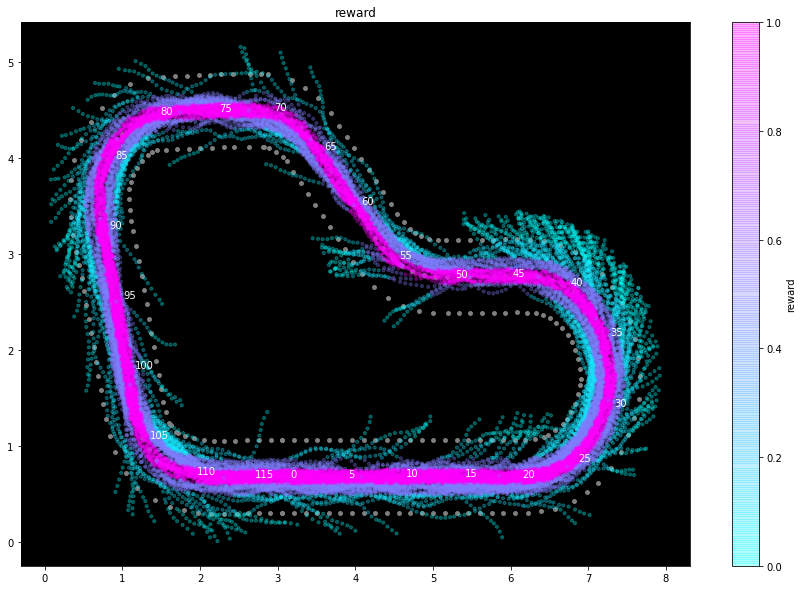

In [ ]:
# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15)
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 자취를 reward에 따라 색깔을 다르게 시각화
plt.scatter(x = df_data['X'], y = df_data['Y'], c = df_data['reward'], s = 10, alpha = 0.3, cmap = plt.cm.cool)
plt.colorbar(label='reward')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10, c = 'white')

# 출력
plt.title('reward')
plt.gca().set_facecolor('black') # 배경색
plt.show()

### 위험 구간 시각화

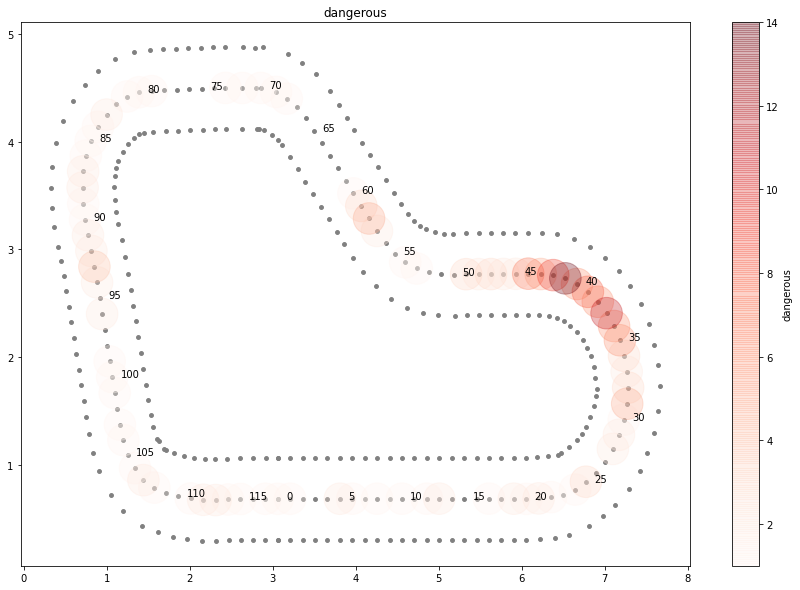

In [ ]:
# off_track
df_last_waypoint = df_data[['episode','closest_waypoint']][df_data['episode_status'] == 'off_track']
df_last_waypoint = df_last_waypoint.rename({'closest_waypoint':'off_track_waypoint'}, axis = 1)
df_last_waypoint = df_last_waypoint.reset_index(drop = True)

# 구간별 off_track 개수
df_dangerous = df_last_waypoint['off_track_waypoint'].value_counts()[::-1]
df_dangerous = df_dangerous.reset_index(name = 'count')
df_dangerous = df_dangerous.rename({'index':'waypoint'}, axis = 1)

# 트랙 시각화
plt.figure(figsize = (15,10))
plt.scatter(track_C[:,0],track_C[:,1], c = 'gray', s = 15, )
plt.scatter(track_L[:,0],track_L[:,1], c = 'gray', s = 15)
plt.scatter(track_R[:,0],track_R[:,1], c = 'gray', s = 15)

# 위험 (이탈) 구간 좌표 가져오기
x_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][0])
y_dan = df_dangerous['waypoint'].apply(lambda w : track_C[w][1])

# 위험 (이탈) 구간을 이탈한 정도에 따라 색깔을 다르게 시각화
plt.scatter(x = x_dan, y = y_dan,  c = df_dangerous['count'], s = 1000, alpha = 0.3, cmap = plt.cm.Reds)
plt.colorbar(label='dangerous')

# waypoint index 시각화
for i, (x, y) in enumerate(track_C) :
    if i % 5 == 0 :
        plt.text(x+0.1, y, i, fontsize=10)

# 출력
plt.title('dangerous')
plt.show()

## 한계점

- iteration.csv 파일에서 아쉽게도 여러 params의 정보들을 볼 수 없다.
  - 확인이 안되는 params 요소 : waypoints, track_width, objects_location 등등
- 참고로 Track Waypoints 는 아래 링크를 통해 확인 가능하다.
  - <https://github.com/aws-deepracer-community/deepracer-race-data/tree/main/raw_data/tracks>
- 다음 장에서 params에 있는 모든 요소들을 모두 print 하고 로그 기록들을 전처리하는 과정들을 살펴본다.